<a href="https://colab.research.google.com/github/gigovam/ITSC/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Предвидување на потрошувачката на енергија во едно домаќинство, врз база на потрошувачката од уредите и светилките, температурата и влажноста на воздухот во просториите, како и надворешните временски услови.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KAG_energydata_complete.csv')

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_index()

In [ ]:
df = df.groupby(pd.Grouper(freq='1440min')).sum()

In [ ]:
columns = ['Appliances', 'lights', 'RH_2', 'T3', 'T_out', 'Windspeed']

In [ ]:
lag=3

for i in range(1, lag+1):
  for col in columns:
    df[f'{col}_prev_{i}'] = df[col].shift(i)

In [ ]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_2_prev_2,T3_prev_2,T_out_prev_2,Windspeed_prev_2,Appliances_prev_3,lights_prev_3,RH_2_prev_3,T3_prev_3,T_out_prev_3,Windspeed_prev_3
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,5740,1260,873.960000,1970.060833,846.440000,1881.313333,845.920833,1931.682500,818.673333,1984.954167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12,12340,610,2893.295000,6500.450000,2780.302252,6304.281622,2879.085000,6470.376667,2847.280000,6416.185000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-13,13970,780,2764.486667,6172.959167,2673.865809,6065.232351,2823.726667,6295.808333,2737.411667,6093.385000,...,1881.313333,845.920833,248.75,255.5,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-14,21800,720,2933.579167,6110.667500,2843.010833,5860.680833,3000.611667,6249.562500,2691.975000,6225.271667,...,6304.281622,2879.085000,801.55,833.0,5740.0,1260.0,1881.313333,845.920833,248.75,255.5
2016-01-15,18050,860,3208.456667,5630.298333,3100.056764,5499.921234,3018.106667,5963.023333,2824.578333,6042.389167,...,6065.232351,2823.726667,699.40,808.5,12340.0,610.0,6304.281622,2879.085000,801.55,833.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,11960,290,3520.086667,6771.644167,3286.940833,6875.951667,3715.426667,6188.750833,3422.297500,6524.821667,...,6517.973527,3702.570076,2570.55,678.0,9320.0,800.0,6337.747583,3534.566667,1983.95,555.5
2016-05-24,13850,610,3499.105000,6064.205000,3256.990833,6145.586667,3653.127500,5755.364167,3437.145667,5983.519119,...,7346.311854,3855.819091,2234.00,449.0,23280.0,220.0,6517.973527,3702.570076,2570.55,678.0
2016-05-25,12080,370,3441.506764,5605.893366,3296.832933,5498.230703,3605.519340,5491.856913,3437.894264,5555.866251,...,6875.951667,3715.426667,1810.15,606.0,15860.0,40.0,7346.311854,3855.819091,2234.00,449.0


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
x_columns=[]
for col in columns:
  x_columns = x_columns + [f'{col}_prev_{i}' for i in range(1, lag + 1)]

In [ ]:
X, y = df[x_columns], df['Appliances']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [ ]:
X_train.shape

(108, 18)

In [ ]:
X_train = X_train.reshape(-1, lag, len(X_train[0]) // lag)
X_test = X_test.reshape(-1, lag, len(X_test[0]) // lag)
X_train.shape

(108, 3, 6)

In [ ]:
model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=20, shuffle=False)

Epoch 1/20
6/6 [==============================] - 3s 97ms/step - loss: 0.1866 - mean_squared_error: 0.1866 - mean_absolute_error: 0.3755 - val_loss: 0.1358 - val_mean_squared_error: 0.1358 - val_mean_absolute_error: 0.3242
Epoch 2/20
6/6 [==============================] - 0s 13ms/step - loss: 0.1378 - mean_squared_error: 0.1378 - mean_absolute_error: 0.3060 - val_loss: 0.0874 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2366
Epoch 3/20
6/6 [==============================] - 0s 16ms/step - loss: 0.0880 - mean_squared_error: 0.0880 - mean_absolute_error: 0.2268 - val_loss: 0.0435 - val_mean_squared_error: 0.0435 - val_mean_absolute_error: 0.1412
Epoch 4/20
6/6 [==============================] - 0s 14ms/step - loss: 0.0544 - mean_squared_error: 0.0544 - mean_absolute_error: 0.1802 - val_loss: 0.0405 - val_mean_squared_error: 0.0405 - val_mean_absolute_error: 0.1695
Epoch 5/20
6/6 [==============================] - 0s 13ms/step - loss: 0.0598 - mean_squared_error: 0.0598 -

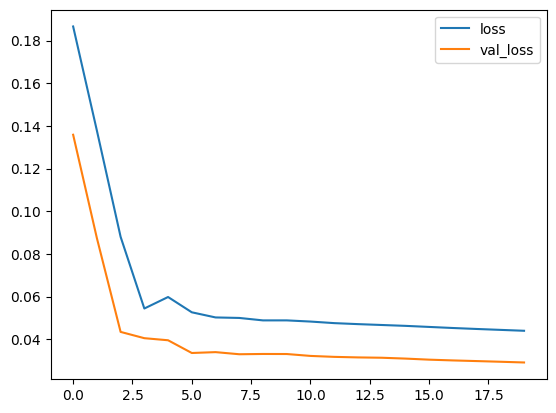

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
preds = scaler.inverse_transform(preds)

In [ ]:
mean_squared_error(preds, Y_test), mean_absolute_error(preds, Y_test), r2_score(preds, Y_test)

(17354087.58023103, 3491.060076678241, -9.865947465004297)

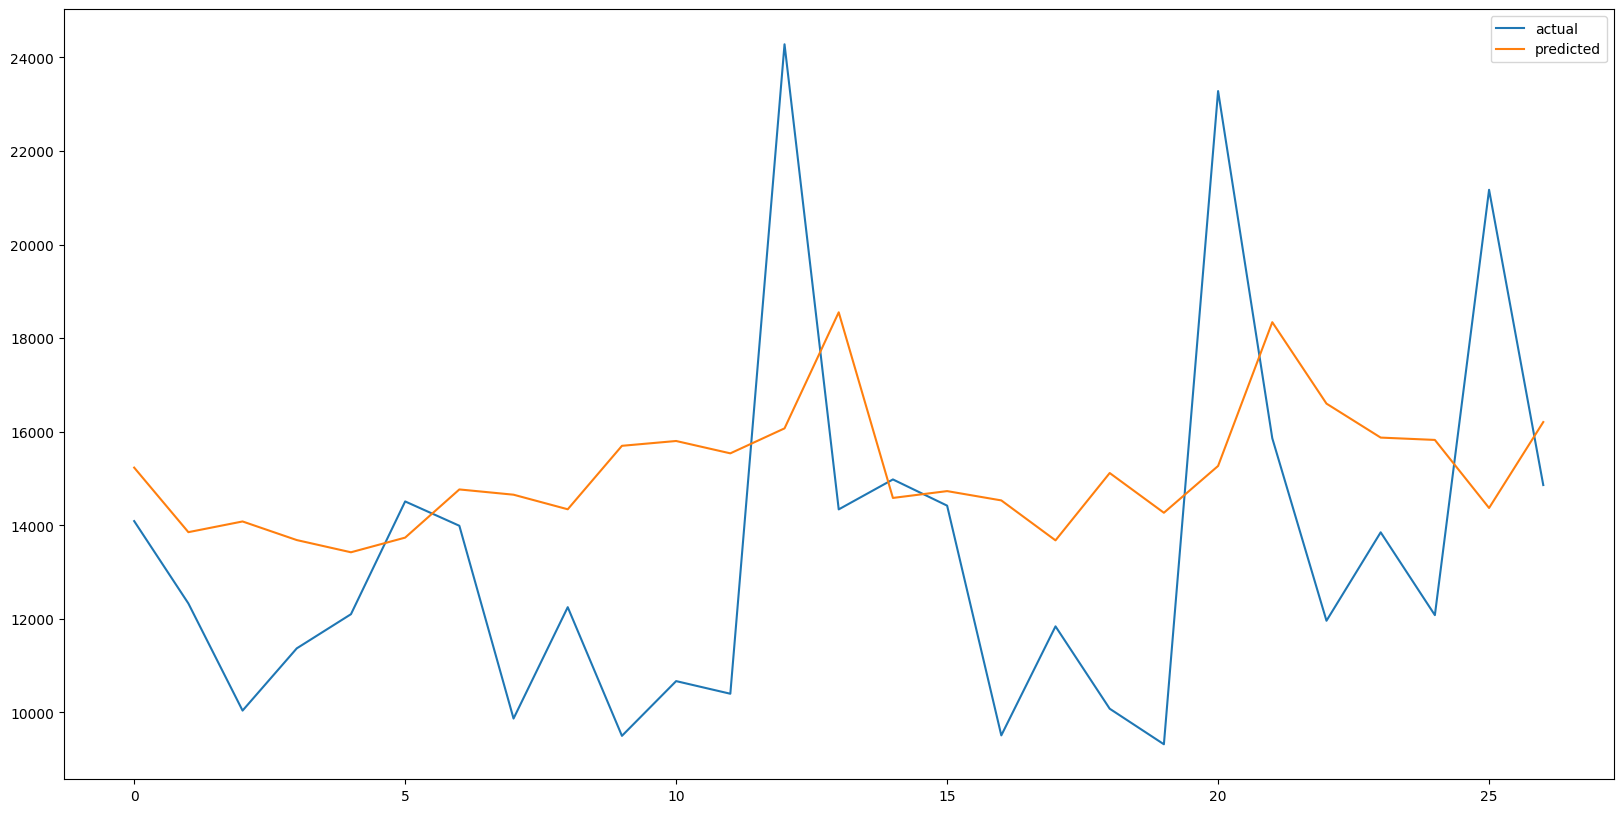

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Y_test.values, label='actual')
plt.plot(preds, label='predicted')
plt.legend()
plt.show()